# Runge Kutta 4

Assuming this model.
$$
\frac{dx}{dt} = f(x)
$$
with $x(t_0) = x_0$.

In [109]:
import matplotlib.pyplot as plt

In [110]:
import numpy as np

from collections.abc import Callable

class NumSim:
    def __init__(self, func: Callable, dt=0.01, method="RK4"):
        self._callable = func
        self._dt = dt
        self._method = method  # RK4 or Euler
    
    def step(self, x_now: np.ndarray):
        if self._method == "RK4":
            k1 = self._callable(x_now)
            k2 = self._callable(x_now + self._dt * k1/2.)
            k3 = self._callable(x_now + self._dt * k2/2.)
            k4 = self._callable(x_now + self._dt * k3)
            out = x_now + self._dt * (k1 + 2*k2 + 2*k3 + k4)/6.
        elif self._method == "Euler":
            out = x_now + self._dt * self._callable(x_now)
        else:
            raise ValueError("Invalid Numerical Method Name: RK4 or Euler")
        return out

## Example: Damped Oscillation

https://slpr.sakura.ne.jp/qp/rk4/

Simple damping system:
$$
\frac{dy}{dt} = v
$$
$$
\frac{dv}{dt} = -y - 2\gamma v
$$

Analytical solution (y_0 = 1, v_0 = -0.15):
$$
y(t) = \exp(-\gamma t) \cos(t \sqrt{1 - 0.15^2})
$$

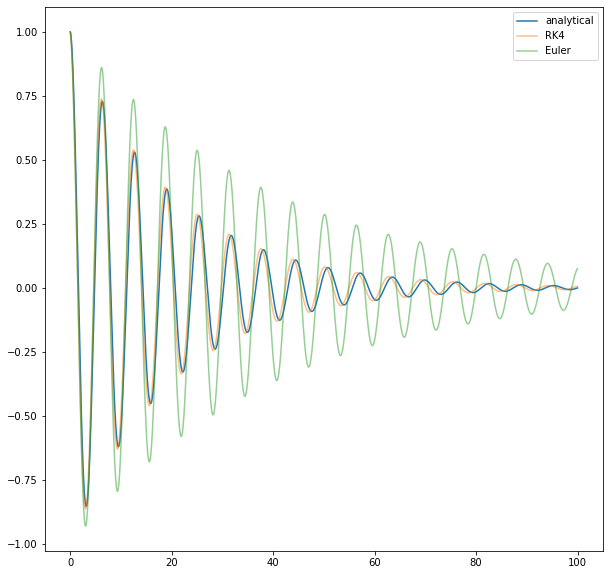

In [115]:
gamma = 0.05

def f(x):
    # x = [y, v]^T
    a = np.array(
        [
            [0, 1],
            [-1, -2*gamma]
        ]
    )
    return np.matmul(a, x)



t_max = 100
steps = 2000
x_hist = []
x2_hist = []

sim = NumSim(func=f, dt=t_max/steps)
sim_e = NumSim(func=f, dt=t_max/steps, method="Euler")

t_hist = []
x = np.array([1, -0.15])
x2 = np.array([1, -0.15])
for t in range(steps):
    t_hist.append(t * sim._dt) 
    x_hist.append(x[0])
    x2_hist.append(x2[0])

    x = sim.step(x)
    x2 = sim_e.step(x2)
    
t = np.linspace(0, t_max, 5000)
x_analytical = np.exp(-gamma*t) * np.cos(t * np.sqrt(1 - 0.15**2))

plt.figure(figsize=(10, 10))
plt.plot(t, x_analytical, alpha=1)
plt.plot(t_hist, x_hist, alpha=0.5)
plt.plot(t_hist, x2_hist, alpha=0.5)
plt.legend(["analytical", "RK4", "Euler"])